# **Bike Sharing Case Study**

#### Case study done by: <br> <font color=green> Partha Sarathi Sahoo

**Problem Statement:** Understand the importance of different variables which affect the demand of bike sharing and present that to business.

## 1. Importing various libraries

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [2]:
#Suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Importing the dataset and performing the initial check

In [3]:
bikerental = pd.read_csv('day.csv',parse_dates=['dteday'])
bikerental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikerental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [5]:
bikerental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bikerental.shape

(730, 16)

In [7]:
# Checking for null counts
bikerental.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

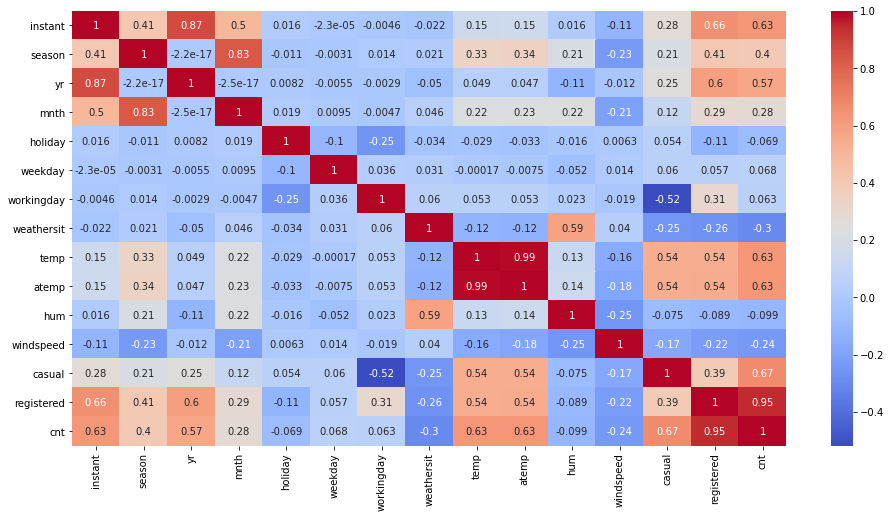

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(bikerental.corr(),cmap='coolwarm',annot=True)
plt.show()

## 3. Analyzing the data and checking for any kind of trends 

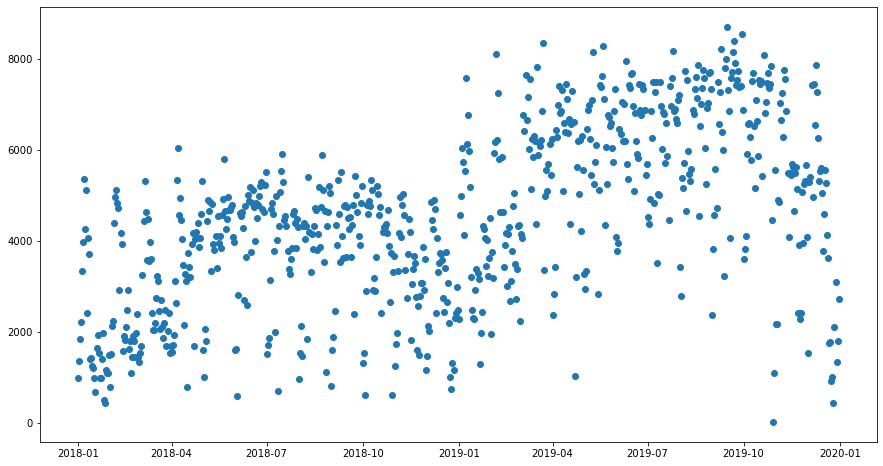

In [9]:
plt.figure(figsize=(15,8))
plt.scatter(x=bikerental['dteday'],y=bikerental['cnt'])
# plt.xlabel('Dates')
# plt.ylabel('Cnt')
# plt.title('Cnt against dates')
# plt.show()

> We see that the rental was increased in 2019 but it drops around January. The reason for drop is obviously is Corona Virus Pandemic.

In [10]:
# Dropping instant as its just a serial number
# Dropping dteday as the details are already available in other columns
# Dropping atemp as its correlation with temp is too high at 0.99. So we can keep either one of them
# Dropping casual and registered as we are defining cnt as the target variable its summation of casual and registered

bikerental = bikerental.drop(['instant','dteday','atemp','casual','registered'],axis=1)

In [11]:
#Replacing the season column with the values
bikerental.season=bikerental.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

#Replacing the mnth column with the values
bikerental.mnth=bikerental.mnth.replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

#Replacing the weekday column with the values
bikerental.weekday=bikerental.weekday.replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu',5:'Fri',6:'Sat'})

#Replacing the weathersit column with the values
bikerental.weathersit=bikerental.weathersit.replace({1: 'Clear', 2:'Mist + Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'})

bikerental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### Analyzing the categorical data for insights

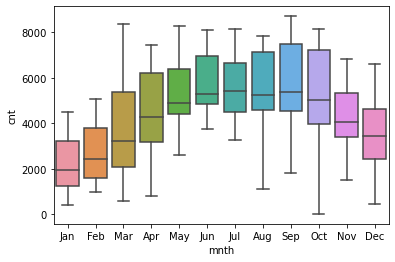

In [12]:
sns.boxplot(data=bikerental,x='mnth',y='cnt')
plt.show()

> Looks like the rental are normally high during the summer times while its pretty low during winter times. October and March show some days where the rental are high and some where rental are low.

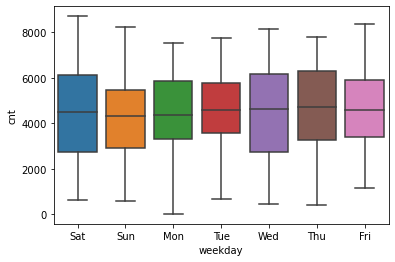

In [13]:
sns.boxplot(data=bikerental,x='weekday',y='cnt')
plt.show()

> There is no clear trend when weekday is considered. But we can see that on saturday , the cnt is higher than that in other days

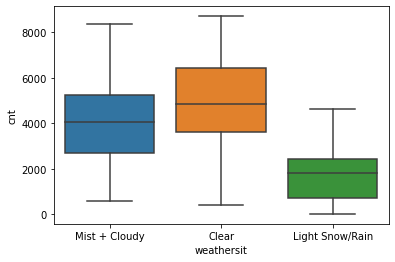

In [14]:
sns.boxplot(data=bikerental,x='weathersit',y='cnt')
plt.show()

> Clealy we can see that there is a higher number of rentals on clear and cloudy days and people don't prefer to  use the rental on a rainy day. This can feature in our featured variable list

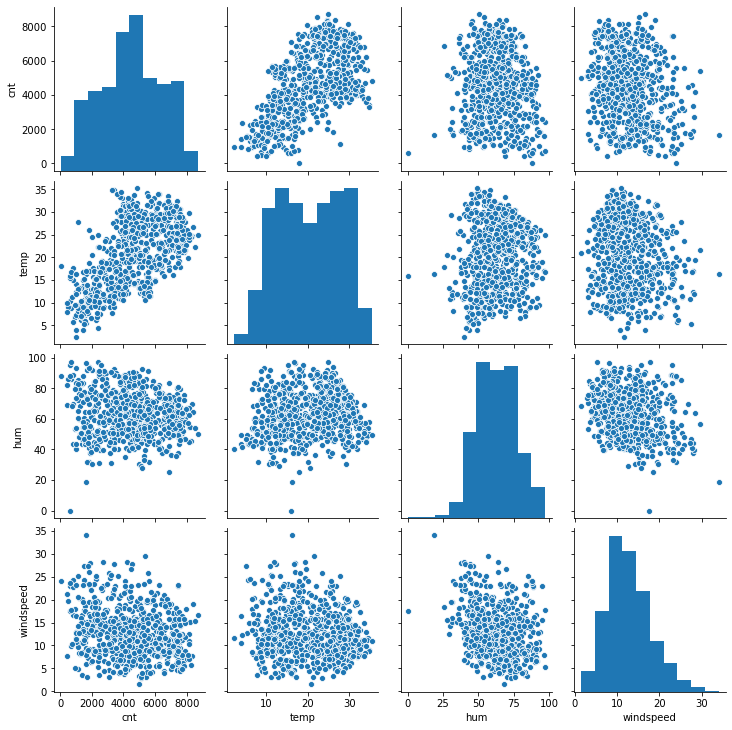

In [15]:
# Analyzing the continuous variable
sns.pairplot(bikerental[['cnt','temp','hum','windspeed']])

> We can see that temperature can have a direct impact on the count of rentals as its highly correlated with cnt, so this can be one of the variables in our final featured variables

## 4. Getting the dummy variables for the categorical variables

In [16]:
bikerental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [17]:
bikerental = pd.get_dummies(bikerental,['season','mnth','weekday','weathersit'],drop_first=True)

In [18]:
bikerental.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## 5. Splitting the data into train and test

In [19]:
df_train,df_test = train_test_split(bikerental,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [20]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,63.123710,12.834912,4485.337255,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,7.431626,14.153170,5.292031,1950.666077,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> There are some variables where the min and max are different. We need to scale those.

In [21]:
scaler = MinMaxScaler()

#Columns to scale = temp,cnt,hum,windspeed
colstoscale = ['temp','cnt','hum','windspeed']
df_train[colstoscale]=scaler.fit_transform(df_train[colstoscale])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## 6. Using RFE to select 15 variables

In [22]:
Y_train = df_train.pop('cnt')
X_train = df_train

In [23]:
#Using RFE
lm = LinearRegression()

lm.fit(X_train,Y_train)

rfe=RFE(lm,15)

rfe=rfe.fit(X_train,Y_train)

In [24]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 10),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 11),
 ('weathersit_Light Snow/Rain', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [25]:
#Get the selected 15 columns
sel15cols = X_train.columns[rfe.support_]
sel15cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weathersit_Light Snow/Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

## 7. Building model using statsmodels for detailed analysis

### a. Iteration 1

In [26]:
X_train_rfe=X_train[sel15cols]

# Adding a constant to the X_train_sm
X_train_rfe=sm.add_constant(X_train_rfe)

# Create a model
lr=sm.OLS(Y_train,X_train_rfe)

# fit
lr_model=lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.22e-191
Time:                        22:06:34   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2519      0.036      6.969      0.000       0.181       0.323
yr                             0.2305      0.008     28.795      0.000       0.215       0.246
holiday                       -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                     0.0433      0.012      3.762      0.000       0.021       0.066
temp                           0.5096      0.034     14.837      0.000       0.442       0.577
hum                           -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                     -0.1863      0.025     -7.310      0.000      -0.236      -0.136
season_spring                 -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer                  0.0508      0.015      3.423      0.001       0.022       0.080
season_winter                  0.0933      0.017      5.403      0.000       0.059       0.127
mnth_Jan                      -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_Jul                      -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sep                       0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Sat                    0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Light Snow/Rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist + Cloudy      -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [27]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'].round(2)
vif=vif.sort_values(by='VIF',ascending=False)

In [28]:
vif

,Features,VIF
0,const,84.597970
7,season_spring,5.084219
4,temp,3.889050
9,season_winter,3.591940
8,season_summer,2.648669
5,hum,1.914281
3,workingday,1.880465
13,weekday_Sat,1.781492
15,weathersit_Mist + Cloudy,1.568986
10,mnth_Jan,1.567674


In [29]:
## The mnth_Jan has high p value, although the VIF of mnth_Jan is low, we can drop that
X_train_rfe.drop(['mnth_Jan'],axis=1,inplace=True)

### b. Iteration 2

In [30]:
# Create a model
lr=sm.OLS(Y_train,X_train_rfe)

# fit
lr_model=lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.11e-191
Time:                        22:06:34   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2402      0.036      6.714      0.000       0.170       0.310
yr                             0.2298      0.008     28.647      0.000       0.214       0.246
holiday                       -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday                     0.0430      0.012      3.725      0.000       0.020       0.066
temp                           0.5277      0.033     15.884      0.000       0.462       0.593
hum                           -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring                 -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer                  0.0537      0.015      3.631      0.000       0.025       0.083
season_winter                  0.0992      0.017      5.815      0.000       0.066       0.133
mnth_Jul                      -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                       0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Sat                    0.0530      0.015      3.648      0.000       0.024       0.082
weathersit_Light Snow/Rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Mist + Cloudy      -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         21.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> We can see that adjusted R-sq is almost negligible

In [31]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'].round(2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,82.346843
7,season_spring,5.019137
4,temp,3.616501
9,season_winter,3.485532
8,season_summer,2.621807
5,hum,1.906322
3,workingday,1.880139
12,weekday_Sat,1.780912
14,weathersit_Mist + Cloudy,1.568983
10,mnth_Jul,1.487517


In [32]:
## The column holiday has high p value, so we can certainly drop that. 
X_train_rfe.drop(['holiday'],axis=1,inplace=True)

### c. Iteration 3

In [33]:
# Create a model
lr=sm.OLS(Y_train,X_train_rfe)

# fit
lr_model=lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          1.54e-191
Time:                        22:06:34   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2307      0.036      6.472      0.000       0.161       0.301
yr                             0.2300      0.008     28.568      0.000       0.214       0.246
workingday                     0.0518      0.011      4.764      0.000       0.030       0.073
temp                           0.5278      0.033     15.827      0.000       0.462       0.593
hum                           -0.1594      0.037     -4.253      0.000      -0.233      -0.086
windspeed                     -0.1815      0.026     -7.114      0.000      -0.232      -0.131
season_spring                 -0.0566      0.021     -2.740      0.006      -0.097      -0.016
season_summer                  0.0541      0.015      3.640      0.000       0.025       0.083
season_winter                  0.0983      0.017      5.738      0.000       0.065       0.132
mnth_Jul                      -0.0535      0.018     -2.946      0.003      -0.089      -0.018
mnth_Sep                       0.0799      0.017      4.831      0.000       0.047       0.112
weekday_Sat                    0.0619      0.014      4.420      0.000       0.034       0.089
weathersit_Light Snow/Rain    -0.2442      0.026     -9.330      0.000      -0.296      -0.193
weathersit_Mist + Cloudy      -0.0561      0.010     -5.379      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       71.537   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.647
Skew:                          -0.709   Prob(JB):                     1.32e-40
Kurtosis:                       5.576   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'].round(2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,81.136611
6,season_spring,5.016327
3,temp,3.616495
8,season_winter,3.483236
7,season_summer,2.621522
4,hum,1.905547
2,workingday,1.653679
11,weekday_Sat,1.641776
13,weathersit_Mist + Cloudy,1.568770
9,mnth_Jul,1.486281


In [35]:
## The column season_spring has high p value as well as VIF, so we can certainly drop that. 
X_train_rfe.drop(['season_spring'],axis=1,inplace=True)

### d. Iteration 4

In [36]:
# Create a model
lr=sm.OLS(Y_train,X_train_rfe)

# fit
lr_model=lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          4.14e-191
Time:                        22:06:35   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1712      0.028      6.014      0.000       0.115       0.227
yr                             0.2286      0.008     28.267      0.000       0.213       0.244
workingday                     0.0524      0.011      4.791      0.000       0.031       0.074
temp                           0.5960      0.022     26.667      0.000       0.552       0.640
hum                           -0.1709      0.037     -4.558      0.000      -0.245      -0.097
windspeed                     -0.1888      0.026     -7.393      0.000      -0.239      -0.139
season_summer                  0.0827      0.011      7.770      0.000       0.062       0.104
season_winter                  0.1355      0.010     12.930      0.000       0.115       0.156
mnth_Jul                      -0.0439      0.018     -2.450      0.015      -0.079      -0.009
mnth_Sep                       0.0928      0.016      5.816      0.000       0.061       0.124
weekday_Sat                    0.0625      0.014      4.429      0.000       0.035       0.090
weathersit_Light Snow/Rain    -0.2391      0.026     -9.100      0.000      -0.291      -0.188
weathersit_Mist + Cloudy      -0.0536      0.010     -5.129      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       65.304   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.523
Skew:                          -0.689   Prob(JB):                     5.61e-33
Kurtosis:                       5.257   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'].round(2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,51.112035
4,hum,1.881751
2,workingday,1.652961
10,weekday_Sat,1.641474
3,temp,1.603317
12,weathersit_Mist + Cloudy,1.557183
8,mnth_Jul,1.431646
6,season_summer,1.327517
7,season_winter,1.288076
11,weathersit_Light Snow/Rain,1.242930


In [38]:
## The column mnth_Jul has high p value, so we can certainly drop that. 
X_train_rfe.drop(['mnth_Jul'],axis=1,inplace=True)

### e. Iteration 5

In [39]:
# Create a model
lr=sm.OLS(Y_train,X_train_rfe)

# fit
lr_model=lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          5.10e-191
Time:                        22:06:35   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1705      0.029      5.960      0.000       0.114       0.227
yr                             0.2294      0.008     28.258      0.000       0.213       0.245
workingday                     0.0533      0.011      4.849      0.000       0.032       0.075
temp                           0.5710      0.020     28.558      0.000       0.532       0.610
hum                           -0.1629      0.038     -4.340      0.000      -0.237      -0.089
windspeed                     -0.1864      0.026     -7.268      0.000      -0.237      -0.136
season_summer                  0.0910      0.010      8.984      0.000       0.071       0.111
season_winter                  0.1396      0.010     13.430      0.000       0.119       0.160
mnth_Sep                       0.1027      0.016      6.619      0.000       0.072       0.133
weekday_Sat                    0.0628      0.014      4.433      0.000       0.035       0.091
weathersit_Light Snow/Rain    -0.2426      0.026     -9.197      0.000      -0.294      -0.191
weathersit_Mist + Cloudy      -0.0538      0.011     -5.124      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       72.400   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.721
Skew:                          -0.755   Prob(JB):                     1.03e-36
Kurtosis:                       5.349   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'].round(2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,51.106843
4,hum,1.867536
2,workingday,1.651214
9,weekday_Sat,1.641290
11,weathersit_Mist + Cloudy,1.557080
3,temp,1.270660
7,season_winter,1.254979
10,weathersit_Light Snow/Rain,1.239418
6,season_summer,1.191625
5,windspeed,1.181038


### <font color='green'> All of the VIF are lower than 2 and all the co-eff are significant at this time. <br><br> But since season_winter and workingday are already there, we can do away with the mnth_Sep and weekday_Sat columns

### f. Iteration 6

In [41]:
X_train_rfe.drop(['mnth_Sep','weekday_Sat'],axis=1,inplace=True)

In [42]:
# Create a model
lr=sm.OLS(Y_train,X_train_rfe)

# fit
lr_model=lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.6
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          2.17e-180
Time:                        22:06:36   Log-Likelihood:                 477.40
No. Observations:                 510   AIC:                            -934.8
Df Residuals:                     500   BIC:                            -892.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1949      0.029      6.714      0.000       0.138       0.252
yr                             0.2282      0.009     26.519      0.000       0.211       0.245
workingday                     0.0234      0.009      2.558      0.011       0.005       0.041
temp                           0.5978      0.021     28.700      0.000       0.557       0.639
hum                           -0.1559      0.040     -3.939      0.000      -0.234      -0.078
windspeed                     -0.1930      0.027     -7.106      0.000      -0.246      -0.140
season_summer                  0.0775      0.011      7.372      0.000       0.057       0.098
season_winter                  0.1349      0.011     12.260      0.000       0.113       0.156
weathersit_Light Snow/Rain    -0.2304      0.028     -8.264      0.000      -0.285      -0.176
weathersit_Mist + Cloudy      -0.0484      0.011     -4.364      0.000      -0.070      -0.027
==============================================================================
Omnibus:                       55.021   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.644
Skew:                          -0.516   Prob(JB):                     2.63e-34
Kurtosis:                       5.492   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> We can see that there is no significance difference in R-Squared

In [43]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'].round(2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,46.779913
4,hum,1.845131
9,weathersit_Mist + Cloudy,1.544861
7,season_winter,1.250053
8,weathersit_Light Snow/Rain,1.231864
3,temp,1.226430
5,windspeed,1.179157
6,season_summer,1.142529
1,yr,1.027897
2,workingday,1.013876


### g. Iteration 7

In [44]:
## We see that workingday is now not signigicant. So we will test without that column
X_train_rfe.drop(['workingday'],axis=1,inplace=True)
# Create a model
lr=sm.OLS(Y_train,X_train_rfe)

# fit
lr_model=lr.fit()

# Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     282.5
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          3.20e-180
Time:                        22:06:36   Log-Likelihood:                 474.09
No. Observations:                 510   AIC:                            -930.2
Df Residuals:                     501   BIC:                            -892.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2105      0.029      7.376      0.000       0.154       0.267
yr                             0.2288      0.009     26.449      0.000       0.212       0.246
temp                           0.6003      0.021     28.696      0.000       0.559       0.641
hum                           -0.1573      0.040     -3.955      0.000      -0.235      -0.079
windspeed                     -0.1961      0.027     -7.187      0.000      -0.250      -0.142
season_summer                  0.0783      0.011      7.403      0.000       0.057       0.099
season_winter                  0.1337      0.011     12.098      0.000       0.112       0.155
weathersit_Light Snow/Rain    -0.2273      0.028     -8.116      0.000      -0.282      -0.172
weathersit_Mist + Cloudy      -0.0470      0.011     -4.217      0.000      -0.069      -0.025
==============================================================================
Omnibus:                       61.616   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.101
Skew:                          -0.615   Prob(JB):                     7.69e-35
Kurtosis:                       5.425   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'].round(2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,44.713723
3,hum,1.844751
8,weathersit_Mist + Cloudy,1.540916
6,season_winter,1.247885
7,weathersit_Light Snow/Rain,1.229520
2,temp,1.223641
4,windspeed,1.176850
5,season_summer,1.141703
1,yr,1.027193


In [46]:
#Predicting Training dataset
Y_pred = lr_model.predict(X_train_rfe)
res = Y_train-Y_pred

## 8. Validating the model

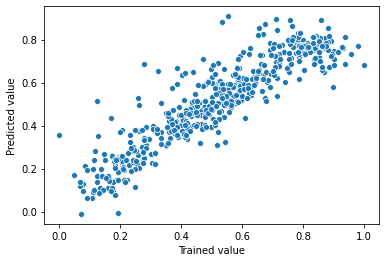

In [47]:
#Training Cnt vs Predicted Cnt
sns.scatterplot(Y_train,Y_pred)
plt.xlabel('Trained value')
plt.ylabel('Predicted value')
plt.show()

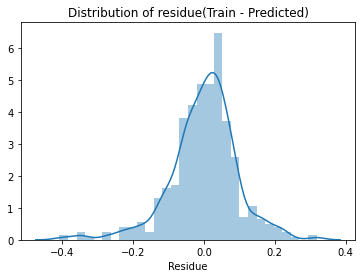

In [48]:
# Checking for normal distribution of the residues
sns.distplot(res)
plt.xlabel('Residue')
plt.title('Distribution of residue(Train - Predicted)')
plt.show()

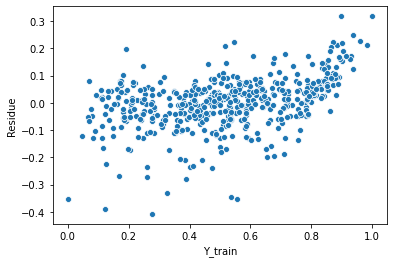

In [49]:
# Checking for pattern of the residue around Y axis(As checking around X will be cumbersome here)
sns.scatterplot(Y_train,res)
plt.xlabel('Y_train')
plt.ylabel('Residue')
plt.show()

### a. Evrything looks perfect now. We have all the VIFs less than 2 
### b. We have all the co-efficient significant as denoted by the p value
### c. We have selected 8 variable to explain the demand
### d. We have an adjusted R-sq of 81.9% and R-sq 81.6%. So they are pretty close to each other.
### e. p(F-statistic) is close to 0 as well indicating the model didn't fit by chance.
### f. The residue distribution is normal as well

## 9. Making Predictions on the test set and evaluating the model on test set

In [50]:
# Scaling the test dataset
#Columns to scale = temp,cnt,hum,windspeed
colstoscale = ['temp','cnt','hum','windspeed']
df_test[colstoscale]=scaler.transform(df_test[colstoscale])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
df_test[colstoscale].describe()

,temp,cnt,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.522154,0.638221,0.313293
std,0.233187,0.219163,0.148694,0.159584
min,0.046591,0.048205,0.261915,-0.042808
25%,0.355429,0.378595,0.529197,0.198843
50%,0.558172,0.524678,0.625590,0.300126
75%,0.755981,0.677750,0.743798,0.402718
max,0.984424,0.963300,1.002146,0.807474


In [52]:
y_test=df_test.pop('cnt')
x_test = df_test

In [53]:
x_test_sm=sm.add_constant(x_test)
x_test_sm=x_test_sm[X_train_rfe.columns]
x_test_sm.head()

,const,yr,temp,hum,windspeed,season_summer,season_winter,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy
184,1.0,0,0.831783,0.657364,0.084219,0,0,0,1
535,1.0,1,0.901354,0.610133,0.153728,1,0,0,0
299,1.0,0,0.511964,0.837699,0.334206,0,1,0,1
221,1.0,0,0.881625,0.437098,0.339570,0,0,0,0
152,1.0,0,0.817246,0.314298,0.537414,1,0,0,0


In [54]:
#predict
y_test_pred = lr_model.predict(x_test_sm)

In [55]:
#Evaluating the model using R2
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7880736259491377

### 1.<font color=blue> We get r2_score of 78.8% on the test dataset which is quite good and close to our trained R2_score

### 2. <font color=blue> The equation of our best fitted line is : 
#### cnt = 0.2105 + 0.2288*yr + 0.6003 *temp + 0.0783 * season_summer+ 0.1337 * season_winter - 0.1573 * hum - 0.1961 * windspeed - 0.2273 * weathersit_Light Snow/Rain - 0.0470 * weathersit_Mist + Cloudy

### 3. <font color=blue> We can see that yr, temp, summer season and winter season helps increase in rental counts while more humidity, windy atmosphere, Snow/Rain and Mist/Cloudy weather negatively affect the rental count